In [28]:
import numpy as np
import random
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import defaultdict

In [21]:
# array size:
n = 20

In [22]:
def random_subset(start, end, size):
  """Generates a random subset of integers within a given range.

  Args:
    start: The starting integer of the range (inclusive).
    end: The ending integer of the range (inclusive).
    size: The desired size of the subset.

  Returns:
    A list containing a random subset of integers.
  """
  if size > (end - start + 1):
      raise ValueError("Subset size cannot be larger than the range.")
  return random.sample(range(start, end + 1), size)

In [23]:
def sample_of_100(sizes, combinations_list, i):
    ITERATIONS = 100
    for _ in tqdm(range(ITERATIONS), desc=f"Sampling Progress for iteration {i}"):
        subset = random_subset(1, 100, n)
        target = np.random.randint(1, 100)
    
        for i in range(n):
          combinations_list = list(combinations(subset, i))
    
          for combo in combinations_list:
            if sum(combo) == target:
              sizes[len(combo)] += 1
    return sizes

In [24]:
ITERATIONS2 = 10

all_combos = []

for i in range(ITERATIONS2):
    sizes = dict(zip(np.arange(1, n+1), np.zeros(n)))
    combinations_list = []
    sizes = sample_of_100(sizes, combinations_list, i)
    all_combos.append(sizes)
    print(f"done with iteration {i}")


Sampling Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.62it/s]


done with iteration 0


Sampling Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.67it/s]


done with iteration 1


Sampling Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.65it/s]


done with iteration 2


Sampling Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.69it/s]


done with iteration 3


Sampling Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.69it/s]


done with iteration 4


Sampling Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.70it/s]


done with iteration 5


Sampling Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.63it/s]


done with iteration 6


Sampling Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.70it/s]


done with iteration 7


Sampling Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.04it/s]


done with iteration 8


Sampling Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.86it/s]

done with iteration 9


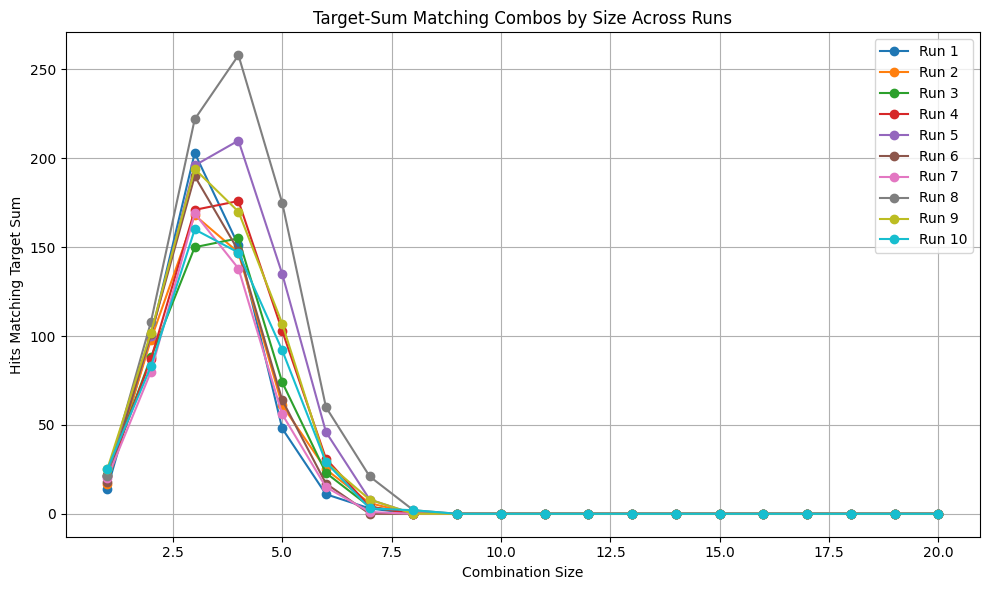

In [25]:
for_plotting = sorted(all_combos[0].keys())
matrix = np.array([[res[for_plot] for for_plot in for_plotting] for res in all_combos])

plt.figure(figsize=(10, 6))
for i, row in enumerate(matrix):
    plt.plot(for_plotting, row, label=f"Run {i+1}", marker='o')

plt.xlabel("Combination Size")
plt.ylabel("Hits Matching Target Sum")
plt.title("Target-Sum Matching Combos by Size Across Runs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

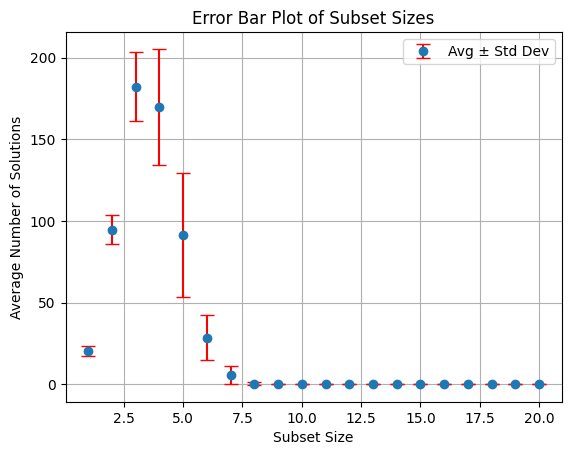

In [32]:
subset_sums = defaultdict(list)

for run in all_combos:
    for size, count in run.items():
        subset_sums[size].append(count)

avg_counts = {k: np.mean(v) for k, v in subset_sums.items()}
std_devs = {k: np.std(v) for k, v in subset_sums.items()}

keys = sorted(avg_counts.keys())
plt.errorbar(
    keys,
    [avg_counts[k] for k in keys],
    yerr=[std_devs[k] for k in keys],
    fmt='o',
    ecolor='red',
    capsize=5,
    label='Avg ± Std Dev'
)
plt.xlabel("Subset Size")
plt.ylabel("Average Number of Solutions")
plt.title("Error Bar Plot of Subset Sizes")
plt.legend()
plt.grid(True)
plt.show()